## Tweet volume

In [2]:
import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_json('data/topic/preds_extended.jsonl', 
                  orient='records',
                  lines=True)

In [4]:
sns.set_style('whitegrid', {'grid.linestyle': 'dotted'})

### Tweet Volume

In [5]:
summary = df.groupby('entity').aggregate({'created_at': 'min',
                                          'text': 'count'}).reset_index()
summary['end_date'] = '2022-06-29'
summary[['end_date',
         'created_at']] = summary[['end_date',
                                   'created_at']].apply(pd.to_datetime)
summary['n_days'] = (summary['end_date'] - summary['created_at']).dt.days
summary['tweets_per_day'] = (summary['text'] / summary['n_days']).round(2)
summary.columns = ['entity', 'first tweet', '# tweets', 'last tweet', '# days', 'tweets per day']
summary = summary[['entity', '# tweets', 'first tweet', 'last tweet', '# days', 'tweets per day']]

In [6]:
summary

,entity,# tweets,first tweet,last tweet,# days,tweets per day
0,10DowningStreet,11595,2008-03-26,2022-06-29,5208,2.23
1,EUCouncil,5652,2012-12-04,2022-06-29,3494,1.62
2,EU_Commission,29621,2010-06-23,2022-06-29,4389,6.75
3,Europarl_EN,18485,2009-04-30,2022-06-29,4808,3.84
4,IMFNews,19361,2009-03-24,2022-06-29,4845,4.00
5,OECD,13558,2009-03-19,2022-06-29,4850,2.80
6,UN,42664,2008-12-20,2022-06-29,4939,8.64
7,ecb,14948,2010-04-28,2022-06-29,4445,3.36
8,scotgov,12090,2009-06-16,2022-06-29,4761,2.54


### Plot tweet volume

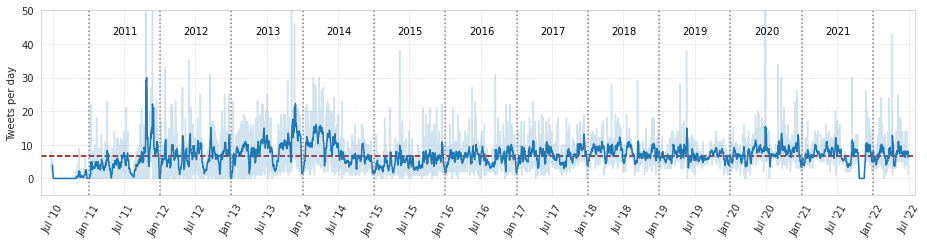

In [7]:
plot_volume(df, interactive=False,
            figsize=(13,3.5), 
            plot_smooth_only=False,
            exclude_entities=set(df.entity.unique().tolist()) - set(['EU_Commission']),
            ylim=True, freq='D', roll_window=7)

### Plot tweet volume for all other agencies

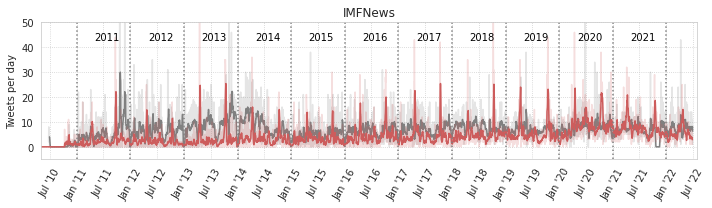

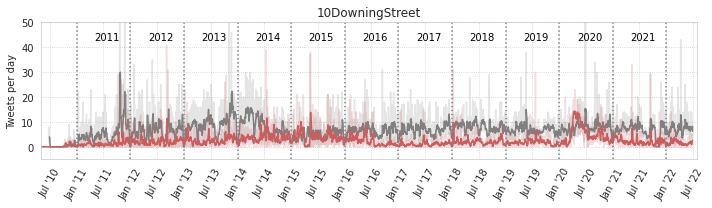

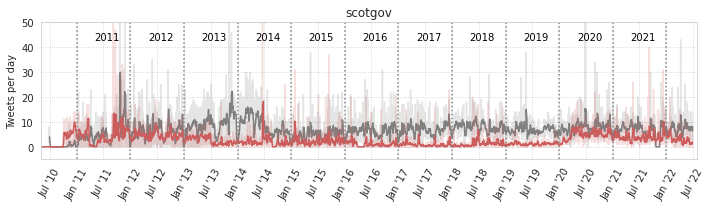

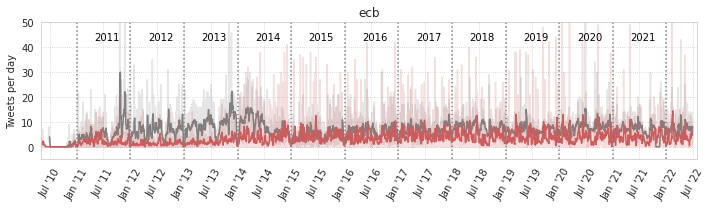

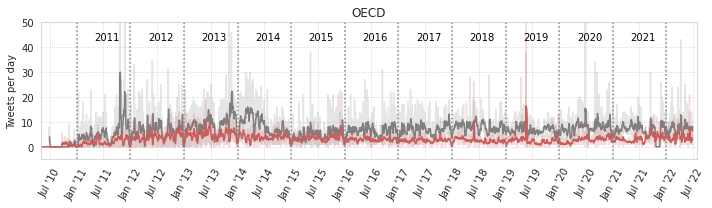

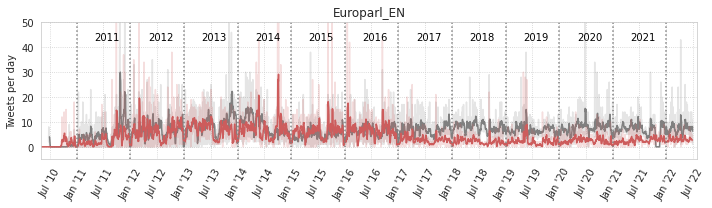

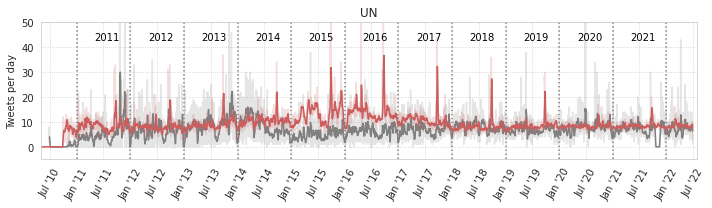

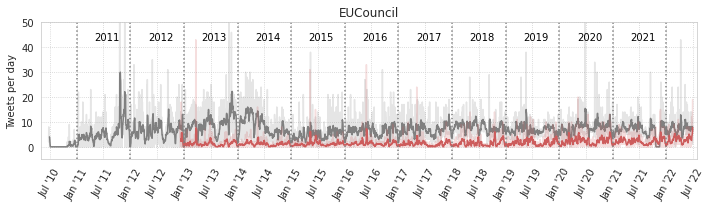

In [374]:
sns.set_style('whitegrid', {'grid.linestyle': 'dotted'})
for entity in set(df.entity.unique().tolist()) - set(['EU_Commission']):
    plot_volume(df, interactive=False,
                figsize=(10,3), 
                plot_smooth_only=False,
                exclude_entities=set(df.entity.unique().tolist()) - set(['EU_Commission', entity]),
                ylim=True, freq='D', roll_window=7,
                multiple=True, colors=['grey', 
                                       'indianred'], 
                savename=entity)